In [1]:
# Importação das bibliotecas e módulos necessários

! pip install ultralytics
! pip install roboflow

from roboflow import Roboflow
from ultralytics import YOLO

In [2]:
# Inserção da chave para integração da API do Roboflow

from getpass import getpass
api_key = getpass('Insira sua API Key: ')

In [3]:
# Obtenção do dataset utilizado para o modelo ("crack Image Dataset" do Roboflow)

rf = Roboflow(api_key=api_key)
project = rf.workspace("university-bswxt").project("crack-bphdr")
dataset = project.version(2).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.109, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to crack-2 in yolov8:: 100%|██████████| 8070/8070 [00:00<00:00, 9399.89it/s] 


In [4]:
# Realizando o treinamento do modelo

model = YOLO('yolov8n.pt')
! yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=10 imgsz=128 plots=True

100%|██████████| 6.23M/6.23M [00:00<00:00, 17.4MB/s]


Ultralytics YOLOv8.0.109 🚀 Python-3.10.6 torch-2.0.1+cu117 CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/home/amandafontes/M6/M6-Inteli-Robot-Simulation/yolo_detection_model/crack-2/data.yaml, epochs=10, patience=50, batch=16, imgsz=128, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, 

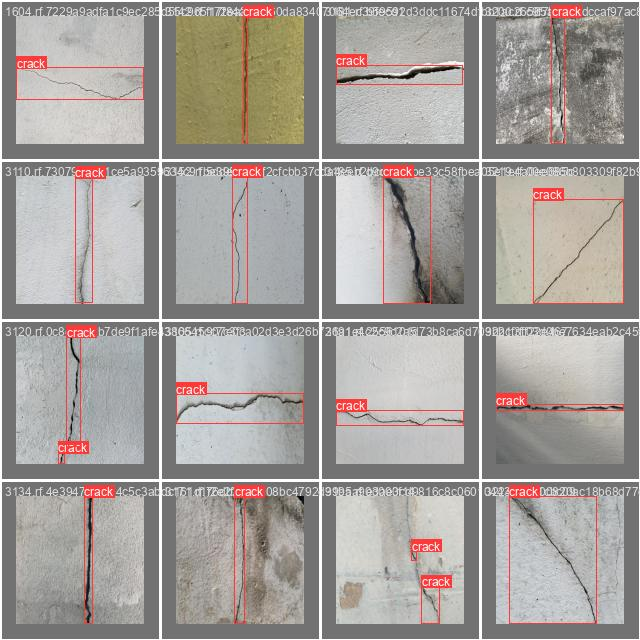

In [7]:
# Exibindo algumas das imagens sobre as quais o modelo atuou

from IPython.display import Image, display

display(Image(filename="runs/detect/train/val_batch0_labels.jpg"))